In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression ,SGDRegressor
from sklearn.preprocessing import PolynomialFeatures , StandardScaler
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline 

In [2]:
X = 6*np.random.rand(200,1) - 3
y = 0.8 *X**2 +0.9 + np.random.randn(200,1)

# y = 0.8 X to the power2 + 0.9x +2

In [111]:
X

array([[-1.39672645],
       [ 1.19884132],
       [ 2.13349022],
       [-2.28974844],
       [-2.44578944],
       [ 0.5723809 ],
       [-0.40939433],
       [-0.90186835],
       [ 1.86487031],
       [ 0.84259699],
       [ 2.97852006],
       [-1.73041801],
       [ 1.54376688],
       [ 0.72771868],
       [ 2.81944865],
       [ 0.15003245],
       [-1.93257538],
       [ 0.880911  ],
       [ 0.55777647],
       [-0.81481077],
       [-0.79641493],
       [ 1.53364106],
       [-2.17560649],
       [-1.5692545 ],
       [ 1.58728675],
       [ 2.68121258],
       [-2.13178076],
       [-1.48877392],
       [-1.2416487 ],
       [-0.39306862],
       [ 2.86250839],
       [ 1.62021313],
       [ 0.11183688],
       [-2.98187313],
       [-2.69935401],
       [ 1.61296048],
       [-2.64308305],
       [ 1.52253233],
       [-1.17292758],
       [ 2.69471432],
       [ 2.46870677],
       [-1.55289954],
       [ 1.24132582],
       [ 1.71173059],
       [ 0.28912654],
       [ 2

In [3]:
import matplotlib.pyplot as plt

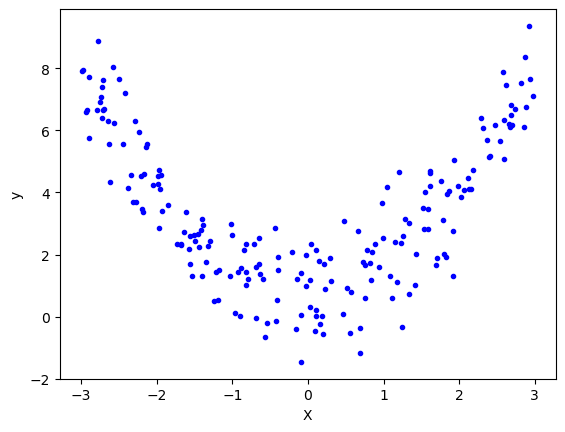

In [4]:
plt.plot(X,y,'b.')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [5]:
X.shape

(200, 1)

In [6]:
X_train , X_test , y_train , y_test = train_test_split(X,y,
                                                      test_size=0.2,
                                                      random_state=2)

In [7]:
lr = LinearRegression()

In [8]:
lr = lr.fit(X_train , y_train)

In [9]:
y_pred = lr.predict(X_test)

In [10]:
r2_score(y_test,y_pred)

-0.13919393650226097

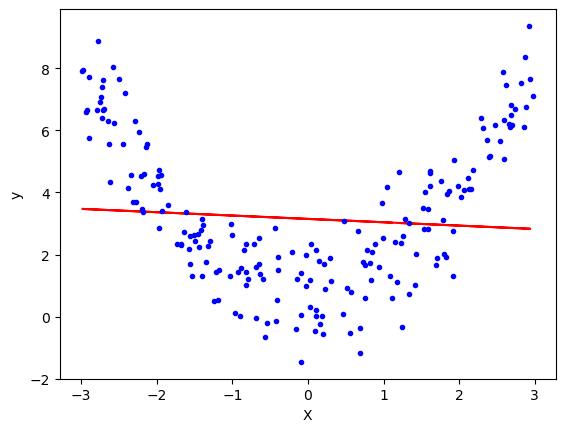

In [11]:
plt.plot(X_train , lr.predict(X_train) ,color='red')
plt.plot(X,y,'b.')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [89]:
#applying ploynomial features
#degree =2

poly = PolynomialFeatures(degree=2)

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

In [90]:
print(X_train[0])
print(X_train_trans[0])

[1.10690507]
[1.         1.10690507 1.22523884]


In [91]:
#include bias parameter

In [92]:
lr = LinearRegression()

In [93]:
lr = lr.fit(X_train_trans ,y_train)

In [94]:
y_pred = lr.predict(X_test_trans)

In [95]:
r2_score(y_test,y_pred)

0.7641087082017435

In [96]:
lr.coef_

array([[0.        , 0.03283708, 0.80652039]])

In [97]:
lr.intercept_

array([0.70642878])

In [98]:
X_new = np.linspace(-3,3,200).reshape(200,1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)

In [99]:
y_new.shape

(200, 1)

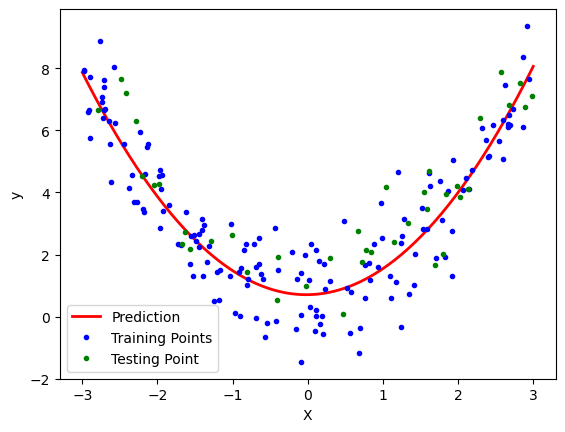

In [100]:
plt.plot(X_new , y_new ,color='red' , linewidth='2' , label = 'Prediction')
plt.plot(X_train ,y_train,'b.' , label = 'Training Points')
plt.plot(X_test , y_test , 'g.' , label='Testing Point')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [109]:
# 3D Polynomial Regression

x = 7 * np.random.rand(100,1) - 2.8
y = 7 * np.random.rand(100,1) - 2.8

z = x**2 + y**2 + 0.2*x + 0.2*y +0.1*x*y + 2 + np.random.randn(100,1)

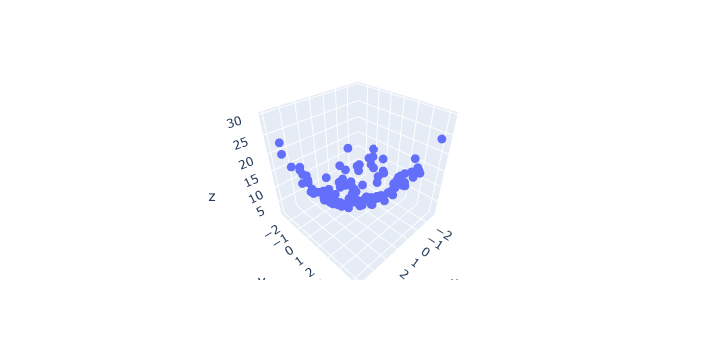

In [110]:
import plotly.express as px


fig = px.scatter_3d( x = x.ravel() , y= y.ravel() , z = z.ravel())
fig.update_traces(marker=dict(size=5))
fig.show()

In [117]:
lr = LinearRegression()
lr.fit(np.array([x,y]).reshape(100,2) , z)

x_input = np.linspace(x.min() , x.max() , 10)
y_input = np.linspace(y.min() , y.max() , 10)
xGrid, yGrid = np.meshgrid(x_input , y_input)

final = np.vstack(( xGrid.ravel().reshape(1,100) , yGrid.ravel().reshape(1,100))).T

z_final = lr.predict(final).reshape(10,10)

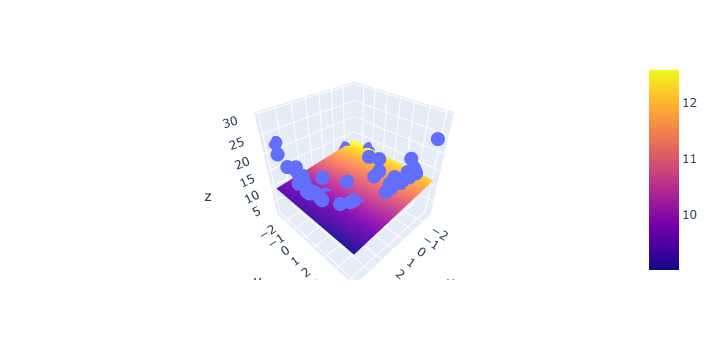

In [118]:
import plotly.graph_objects as go

fig = px.scatter_3d(x=x.ravel() , y=y.ravel() , z=z.ravel())

fig.add_trace(go.Surface(x=x_input , y=y_input , z = z_final))

fig.show()

In [119]:

X_multi = np.array([x,y]).reshape(100,2)
X_multi.shape

(100, 2)

In [144]:

poly = PolynomialFeatures(degree=2)
X_multi_trans = poly.fit_transform(X_multi)

In [145]:
print("Input",poly.n_features_in_)
print("Ouput",poly.n_output_features_)
print("Powers\n",poly.powers_)

Input 2
Ouput 6
Powers
 [[0 0]
 [1 0]
 [0 1]
 [2 0]
 [1 1]
 [0 2]]


In [146]:
X_multi_trans.shape


(100, 6)

In [147]:

lr = LinearRegression()
lr.fit(X_multi_trans,z)

LinearRegression()

In [148]:

X_test_multi = poly.transform(final)

In [149]:
z_final = lr.predict(X_multi_trans).reshape(10,10)


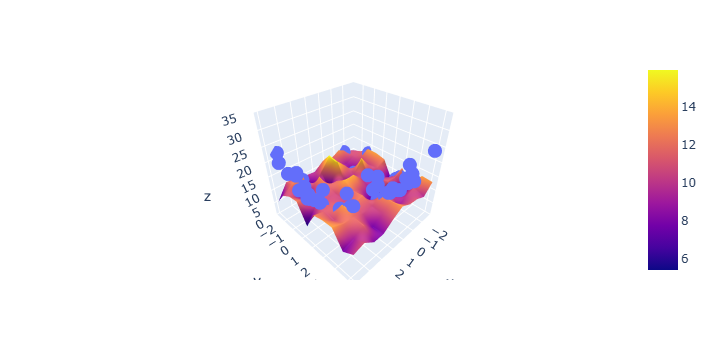

In [150]:

fig = px.scatter_3d(x=x.ravel(), y=y.ravel(), z=z.ravel())

fig.add_trace(go.Surface(x = x_input, y = y_input, z =z_final))

fig.update_layout(scene = dict(zaxis = dict(range=[0,35])))

fig.show()